In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
from scipy.optimize import curve_fit

In [12]:
numA = np.arange(1,17)
data_amp = []
for i in numA:
    #data_amp.append((np.loadtxt('/home/codorso/JoseAye/03_05/5Hz_A{}'.format(i))))
    #data_amp.append((np.loadtxt("C:\\Users\\pc\\Downloads\\Labo6y7\\5-4\\3_05\\5Hz_A{}".format(i))))
    data_amp.append((np.loadtxt("D:\\Carpeta de Documentos\\Aye\\L'etudie\\UBA\\Licenciatura\\Labo 6&7\\5-4\\03_05\\5Hz_A{}".format(i))))

    

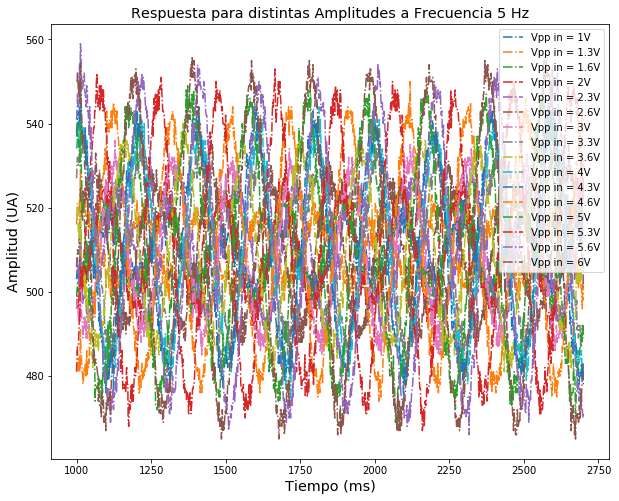

In [22]:
legend_amp = ['Vpp in = 1V', 'Vpp in = 1.3V', 'Vpp in = 1.6V', 'Vpp in = 2V', 'Vpp in = 2.3V', 'Vpp in = 2.6V',
              'Vpp in = 3V', 'Vpp in = 3.3V', 'Vpp in = 3.6V', 'Vpp in = 4V', 'Vpp in = 4.3V', 'Vpp in = 4.6V', 
              'Vpp in = 5V', 'Vpp in = 5.3V', 'Vpp in = 5.6V', 'Vpp in = 6V' ]

cant = len(legend_amp)
fin = 1000
plt.figure(figsize=(10,8))

for i in range(cant):
    plt.plot(data_amp[i][:fin,1], data_amp[i][:fin,2], '-.', label=legend_amp[i])
    plt.grid()
    plt.xlabel('Tiempo (ms)', fontsize='x-large')
    plt.ylabel('Amplitud (UA)', fontsize='x-large')
    plt.legend()

plt.title('Respuesta para distintas Amplitudes a Frecuencia 5 Hz', fontsize='x-large')
plt.show()

In [23]:
tiempo_a = []
volt_a = []
for i in range(cant):
    tiempo_a.append(data_amp[i][:fin,1]/1000) #para convertirlo a segundos
    volt_a.append(data_amp[i][:fin,2]*5/1023)
    
f_sin = lambda x, A, B, C, D: A * np.sin(B*x+C)+D

def ajusteseno(datos_x, datos_y,po):
    popt_sin, pcov_sin = curve_fit(f_sin, datos_x, datos_y, sigma = 0.005*np.ones(len(datos_x)), absolute_sigma=True,p0=po) #po mi parametros iniciales que a ojo yo veo que son. por default son 1.
    return(popt_sin, pcov_sin)

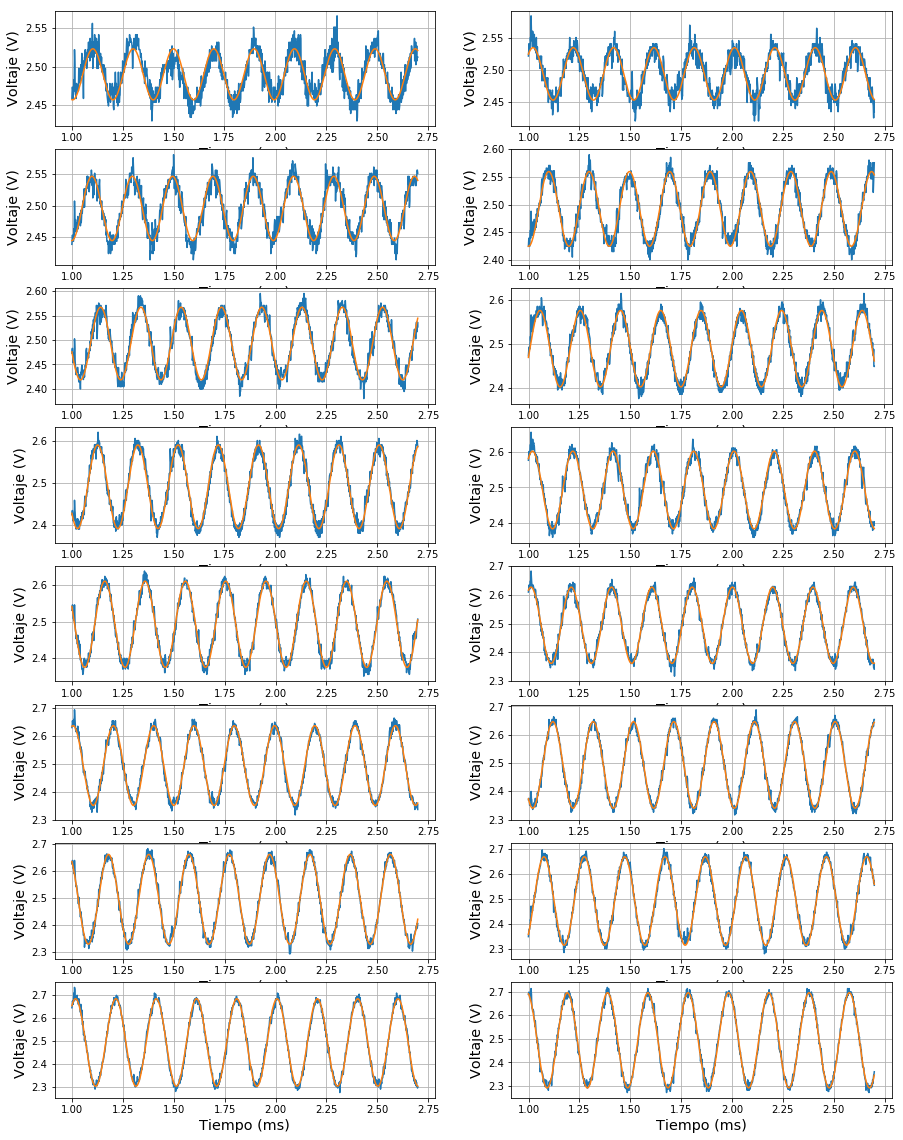

In [32]:
Amp=[]
Amperr=[]
difs = []

plt.figure(figsize=(15,20))

for j in range(cant):
    Da_aux = int(np.mean(volt_a[j]))
    Amp_aux = np.max(volt_a[j]) - Da_aux
    popt_sin, pcov_sin=ajusteseno(tiempo_a[j], volt_a[j],po=[Amp_aux,2*np.pi*5,0,Da_aux])
    Amp.append(popt_sin[0])
    Amperr.append(np.sqrt(pcov_sin[0,0])) 
    difs.append([Amp_aux - popt_sin[0], 2*np.pi*4 - popt_sin[1], popt_sin[2], Da_aux - popt_sin[3]])
    
    plt.subplot(8,2,j+1)
    plt.plot(tiempo_a[j],volt_a[j])
    plt.plot(tiempo_a[j], popt_sin[0] * np.sin(popt_sin[1]*tiempo_a[j]+popt_sin[2])+popt_sin[3])
    plt.xlabel('Tiempo (ms)', fontsize='x-large')
    plt.ylabel('Voltaje (V)', fontsize='x-large')
    plt.grid()

plt.show()

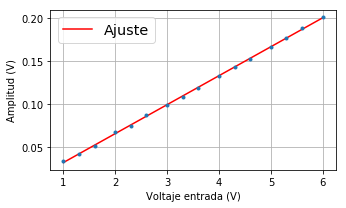

In [65]:
volts = [1, 1.3, 1.6, 2, 2.3, 2.6, 3, 3.3, 3.6, 4, 4.3, 4.6, 5, 5.3, 5.6, 6]
amplitud =  np.abs(Amp)
recta = lambda x, m, b: m*x + b

def ajuste_recta(datos_x, datos_y,po):
    popt_sin, pcov_sin = curve_fit(recta, datos_x, datos_y, sigma = 0.005*np.ones(len(datos_x)), absolute_sigma=True,p0=po) #po mi parametros iniciales que a ojo yo veo que son. por default son 1.
    return(popt_sin, pcov_sin)

popt_sin, pcov_sin = ajuste_recta(volts, amplitud, [1,0])

ajuste = []
for i in range(len(volts)):
    ajuste.append(popt_sin[0]*volts[i] + popt_sin[1])


plt.figure(figsize=(5,3))
plt.errorbar(volts, amplitud , Amperr, fmt='.', ecolor = 'r')
plt.plot(volts, ajuste, 'r-', label = 'Ajuste')
plt.xlabel('Voltaje entrada (V)')#, fontsize='x-large')
plt.ylabel('Amplitud (V)')#, fontsize='x-large')
plt.legend(fontsize='x-large')
#plt.title('Respuesta a distintos voltajes de entrada', fontsize='x-large')
plt.tight_layout()
plt.grid()
plt.savefig('C:\Users\pc\Downloads\Labo6y7\Amplitudes_Piezo.png')
plt.show()